In [1]:
import torch
from torch import nn, optim
from matplotlib import pyplot as plt


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


set_default(figsize=(16, 8))

In [2]:
# Training set
m = 20
x = (torch.rand(m) - 0.5) * 12 # inputs, sampled from -5 from +5
y = x * torch.sin(x) # targets

In [3]:
x, y

(tensor([ 5.7822,  4.4225, -2.4570,  0.4593,  5.0681,  4.8101, -5.8564,  1.2737,
          0.1333, -4.9211,  2.6956, -2.1876, -2.8808,  3.1672,  5.6851,  1.0175,
         -0.3765, -3.1011,  1.8758,  2.9405]),
 tensor([-2.7772, -4.2379,  1.5536,  0.2036, -4.7508, -4.7871, -2.4242,  1.2180,
          0.0177, -4.8143,  1.1628,  1.7845,  0.7428, -0.0811, -3.2012,  0.8657,
          0.1384,  0.1254,  1.7892,  0.5872]))

In [4]:
# Define network architecture (try different non-linearities)

net = nn.Sequential(
    nn.Dropout(p=0.05),
    nn.Linear(1, 20),
    nn.ReLU(),
    nn.Dropout(p=0.05),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

In [5]:
# Training objective and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, weight_decay=0.00001)

In [6]:
# Training loop
for epoch in range(1000):
    y_hat = net(x.view(-1, 1))
    loss = criterion(y_hat, y.view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [7]:
# Define a denser input range
xx = torch.linspace(-15, 15, 1000)

(-10, 5)

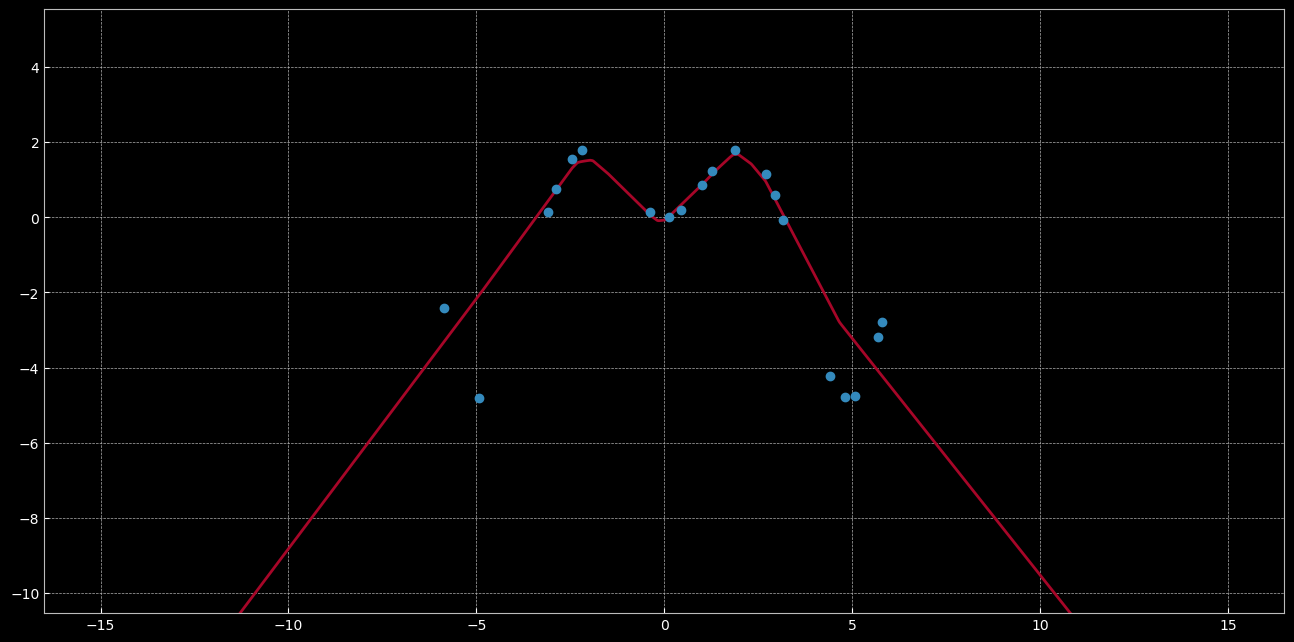

In [8]:
# Evaluate net over denser input (try both eval() and train() model)

net.eval()

with torch.no_grad():
    plt.plot(xx.numpy(), net(xx.view(-1, 1)).squeeze().numpy(), 'C1')
plt.plot(x.numpy(), y.numpy(), 'oC0')
plt.axis('equal')
plt.ylim([-10, 5])

(-10, 5)

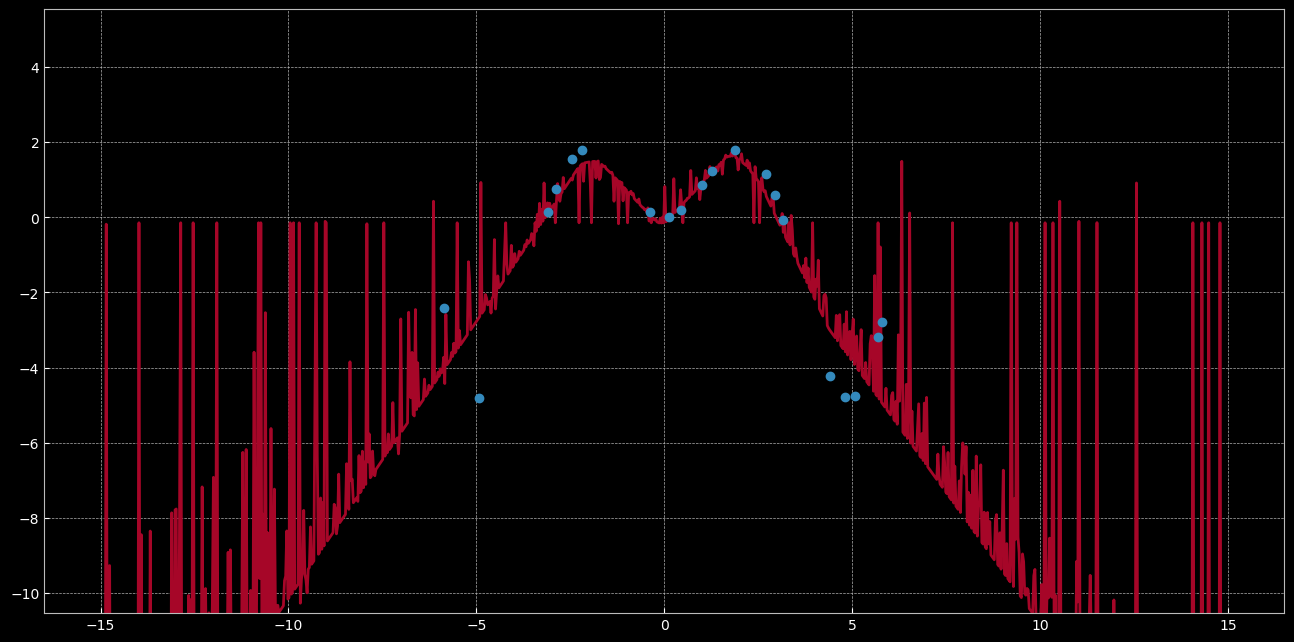

In [9]:
# Evaluate net over denser input (try both eval() and train() model)

net.train()
# 왜 다른가? ==> Dropout

with torch.no_grad():
    plt.plot(xx.numpy(), net(xx.view(-1, 1)).squeeze().numpy(), 'C1')
plt.plot(x.numpy(), y.numpy(), 'oC0')
plt.axis('equal')
plt.ylim([-10, 5])

In [10]:
# Multiple (100) runs for denser input
net.train()
y_hat = list()
with torch.no_grad():
    for t in range(100):
        y_hat.append(net(xx.view(-1, 1)).squeeze())

In [11]:
# Evaluate mean and std over denser input
y_hat = torch.stack(y_hat)
mean = y_hat.mean(0)
std = y_hat.std(0)

(-10, 5)

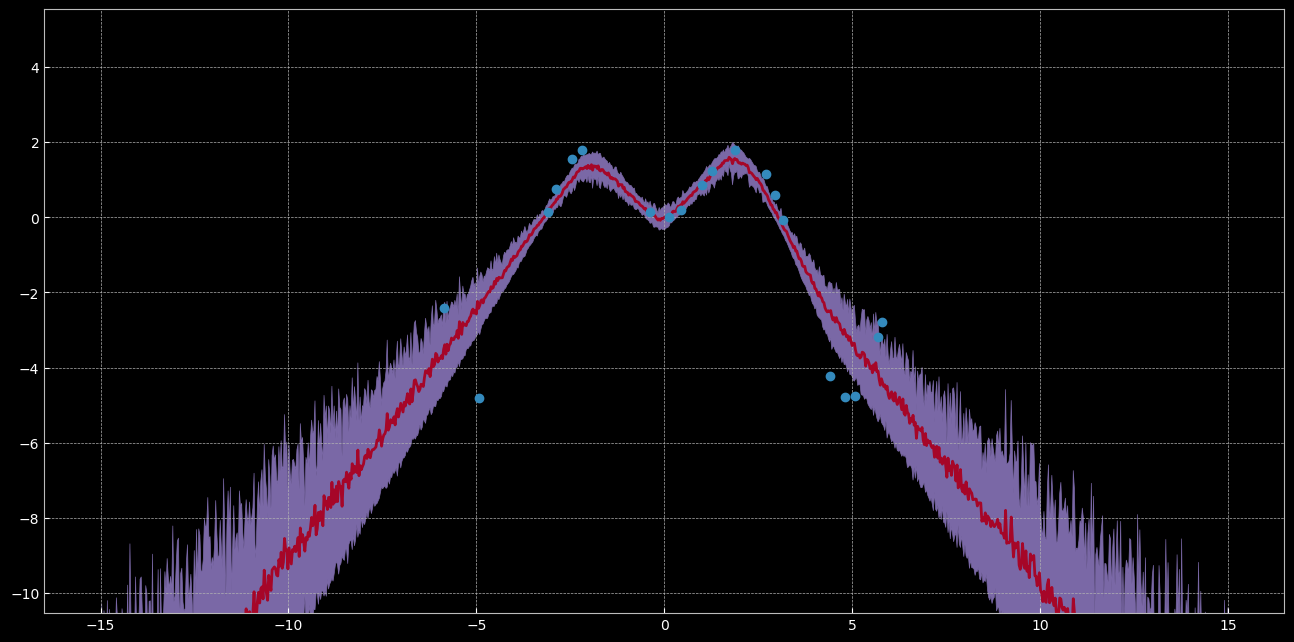

In [12]:
# Visualize mean and mean ± std -> confidence range
plt.plot(xx.numpy(), mean.numpy(), 'C1')
plt.fill_between(xx.numpy(), (mean + std).numpy(), (mean - std).numpy(), color='C2')
plt.plot(x.numpy(), y.numpy(), 'oC0')
plt.axis('equal')
plt.ylim([-10, 5])